### This notebook presents how to obtain number embeddings with NEKG.

<ul>
    <li> In <b>Section 3.1</b>, we construct the knowledge, generating 200 triples (e.g., ['0','isLessThan', '50'], ['100','isLessThan', '150'], etc.).</li><br>
    <li>In <b>Section 3.2</b>, we embed the graph in a 100-D vector space using a standard graph embedding method TransE. We visualize the embedding vectors using t-SNE in a 2-D space.</li><br>
    <li>In <b>Section 3.3</b>, we embed the integers from 500 to 1000 (i.e., [500, 1000)) using the interpolation method and visualize the embedding vectors using t-SNE in a 2-D space.</li>
</ul>




In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import ampligraph
import ampligraph.latent_features as AL

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

<b>VERSION:</b>
<ul>
    <li>python 3.7.3</li>
    <li>tensorflow 1.15.0</li>
    <li>numpy 1.19.5</li>
    <li>ampligraph 1.3.2</li>
    <li>pandas 0.24.1</li>
    <li>sklearn 0.21.2</li>
    <li>matplotlib 3.4.2</li>
</ul>

### 3.1 Knowledge Graph Construction

In [2]:
# Knowledge Graph Construction.
def graph_construction(start, stop, step):
    kg = pd.DataFrame()
    kg['h'] = [i for i in np.arange(start, stop, step)]
    kg['r'] = ['isLessThan'] * int((stop-start) / step)
    kg['t'] = [i for i in np.arange(step, stop+1, step)]
    kg["h"] = kg.h.values.astype(str)
    kg["t"] = kg.t.values.astype(str)
    return kg

In [3]:
start = 0
stop = 10000
step = 50
kg_df = graph_construction(start, stop, step)
kg_df.head()

,h,r,t
0,0,isLessThan,50
1,50,isLessThan,100
2,100,isLessThan,150
3,150,isLessThan,200
4,200,isLessThan,250


### 3.2 Knowledge Graph Embedding

In [4]:
# Embedding Model.
kg_array = kg_df.to_numpy().astype(str)
model = AL.ConvE(epochs=1000, k=100, verbose=True)# the k = 100 is the dimension of the embedding space.
model.fit(kg_array)

2022-11-07 21:37:39.135273: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-11-07 21:37:39.143700: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2592010000 Hz
2022-11-07 21:37:39.145349: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5596ca60c5a0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-11-07 21:37:39.145401: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-11-07 21:37:39.148739: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-11-07 21:37:39.331508: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:969] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-07 21:37:39.331

In [5]:
# Obtain the embedding vector of 100.
embedding = model.get_embeddings(entities='100', embedding_type='entity')
embedding

array([-0.228118  ,  0.06848274, -0.13829103, -0.22078994, -0.28422472,
       -0.19105293, -0.10642591, -0.23820545, -0.1905565 ,  0.12013734,
       -0.17163315,  0.03766308, -0.1886913 , -0.1711233 , -0.23832895,
       -0.21031111, -0.12619853, -0.1760848 , -0.22404967, -0.30634838,
        0.11063691, -0.04707074, -0.22325736,  0.04804422, -0.21849182,
       -0.29591933, -0.23350509,  0.00359076, -0.20890665, -0.17385012,
       -0.21829996, -0.2245477 , -0.12493099, -0.1836386 , -0.26924497,
        0.06665491,  0.0539321 , -0.18413265, -0.2162171 , -0.03650614,
       -0.20478608, -0.02728974,  0.05775648,  0.03459813, -0.15212548,
       -0.23562975, -0.19121777, -0.16907063, -0.13482799, -0.18856661,
        0.05148324,  0.04135592, -0.1689906 , -0.22388841, -0.21212076,
       -0.24026664, -0.2266825 , -0.16411114, -0.15307623,  0.04680861,
       -0.22468388,  0.03482614, -0.18245046, -0.16137218,  0.07592039,
        0.13906473, -0.2055586 ,  0.01483777, -0.17892057, -0.00

In [6]:
# Dimensionality reduction using t-SNE.
embeddings = model.get_embeddings(entities=[str(j) for j in np.arange(start, stop+1, step)], embedding_type='entity')
embeddings = np.asarray(embeddings, dtype='float64')
embeddings_tSNE = TSNE(n_components=2).fit_transform(embeddings)
embeddings_tSNE = pd.DataFrame(embeddings_tSNE, columns=['tSNE_1', 'tSNE_2'])
embeddings_tSNE['magnitude'] = [i for i in range(start, stop+1, step)]
embeddings_tSNE.head()

/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


,tSNE_1,tSNE_2,magnitude
0,-4.471290,2.723689,0
1,-70.420303,50.220043,50
2,12.735065,-25.457026,100
3,22.426720,70.489853,150
4,-1.062421,132.551987,200


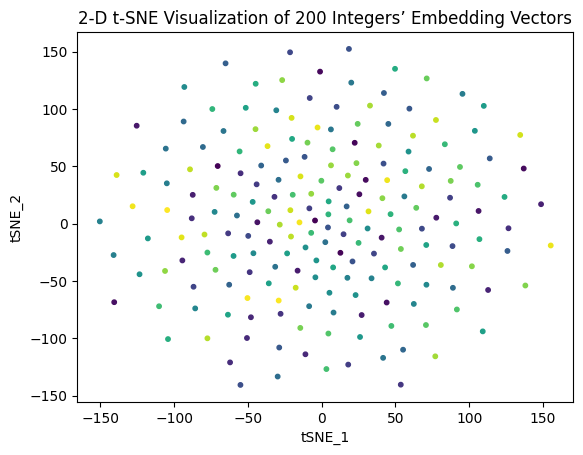

In [7]:
# Visualize the embedding vectors in 2-D space.
plt.scatter(embeddings_tSNE.tSNE_1, embeddings_tSNE.tSNE_2, c=embeddings_tSNE.magnitude, s=10)
plt.title('2-D t-SNE Visualization of 200 Integers’ Embedding Vectors')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.show()

### 3.3 Interpolation Method

In [8]:
# Measure the similarity between numbers.
def cal_sim(x1, x2, x3):
    return (x2-x1)/(x3-x1)

In [9]:
# Obtain embedding vectors for OOVs.
OOVs = range(500, 1000)
OOV_embeddings = []
for i in OOVs:
    for j in np.arange(start, stop+1, step):
        if i < j:
            upper = j
            lower = j-step
            e1 = model.get_embeddings(str(lower), embedding_type='entity')
            e2 = model.get_embeddings(str(upper), embedding_type='entity')
            s2 = cal_sim(lower, i, upper)
            s1 = 1-s2            
            OOV_embeddings.append(e1 * s1 + e2 * s2)
            break

In [10]:
# Dimensionality reduction using t-SNE.
OOV_embeddings = np.asarray(OOV_embeddings, dtype='float64')
OOV_embeddings_tSNE = TSNE(n_components=2).fit_transform(OOV_embeddings)
OOV_embeddings_tSNE = pd.DataFrame(OOV_embeddings_tSNE, columns=['tSNE_1', 'tSNE_2'])
OOV_embeddings_tSNE['magnitude'] = OOVs
OOV_embeddings_tSNE.head()

/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


,tSNE_1,tSNE_2,magnitude
0,-41.916325,-8.576116,500
1,-41.913059,-8.475983,501
2,-41.648571,-8.613534,502
3,-41.924438,-8.135540,503
4,-41.867901,-8.043460,504


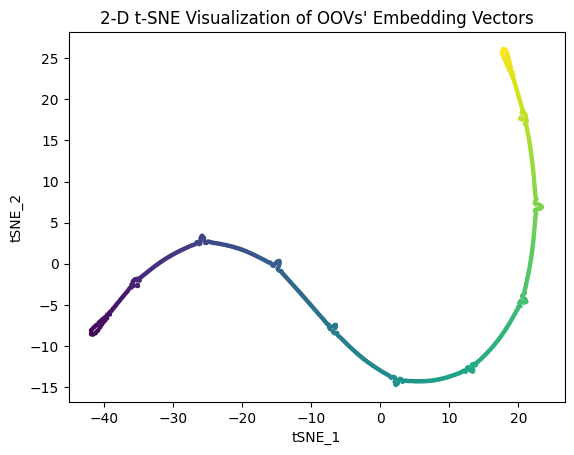

In [11]:
# Visualize the embedding vectors of OOVs in 2-D space.
plt.scatter(OOV_embeddings_tSNE.tSNE_1, OOV_embeddings_tSNE.tSNE_2, c=OOV_embeddings_tSNE.magnitude, s=5)
plt.title('2-D t-SNE Visualization of OOVs\' Embedding Vectors')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.show()